# Examen Python data developer
# Deel 1
## Introductie
Voor dit examen is het belangrijk dat je volgende zaken zeker doet:
 - Maak een Vitual Environment aan & exporteer een `.yml` (of soortgelijke) file aan die je toevoegt aan je codebase.
 - Maak een github pagina aan met een bijhorende `.gitignore` en `readme.md`. Voeg een link naar de github repo toe aan je readme file.
 - Zorg dat je op het einde de tijd neemt om je code op te schonen zodat deze begrijpelijk is voor derden.
 - Wanneer je klaar bent, maak een `.zip` bestand van je volledige codebase aan en laad deze op in de leeromgeving.

In deze opgave bekijken we een gesimuleerde dataset over de geboortes in België van 2019. De data is te vinden in `.csv` bestanden die gelabeld zijn met de echte geboortedag van de personen in het bestand. Laat ons bijvoorbeeld even kijken naar de eerste 5 lijnen van het bestand `2019-1-1.csv`:

<table align="center">
  <tr>
    <th>gemeente</th>
    <th>naam</th>
    <th>geslacht</th>
    <th>verwachte datum</th>
  </tr>
  <tr>
    <td>Hooglede</td>
    <td>Elias</td>
    <td>Mannelijk</td>
    <td>01/14/2019</td>
  </tr>
  <tr>
    <td>Sint-Niklaas (Sint-Niklaas)</td>
    <td>Pauline</td>
    <td>Vrouwelijk</td>
    <td>01/05/2019</td>
  </tr>
  <tr>
    <td>Wijnegem</td>
    <td>Anita</td>
    <td>Vrouwelijk</td>
    <td>01/05/2019</td>
  </tr>
  <tr>
    <td>Grâce-Hollogne</td>
    <td>Jean-Paul</td>
    <td>Mannelijk</td>
    <td>01/13/2019</td>
  </tr>
  <tr>
    <td>Boussu</td>
    <td>François</td>
    <td>Mannelijk</td>
    <td>01/26/2019</td>
  </tr>
</table>


Hier hebben we de kolommen:
 - **gemeente**: De gemeente waar de persoon geboren is.
 - **naam**: De voornaam van de persoon.
 - **geslacht**: Het geslacht van de persoon (Mannelijk of Vrouwelijk).
 - **verwachte datum**: De verwachte geboortedatum van de persoon.

Dus hier hebben we dan bijvoorbeeld op de eerste lijn de mannelijke persoon Elias die geboren is in Hooglede waarvan men verwachtte dat hij zou geboren worden op `01/14/2019` (Amerikaans formaat) maar in feite geboren is op 1 januari 2019.

Doorheen deze opgave gaan we de data van dichterbij inspecteren! Je kan deze opgaves alternatief lezen in de bijgeleverde notebook `examen.ipynb` waar ook de (meeste) afbeeldingen & resultaten zichtbaar zijn.

In [85]:
# Import packages
import pandas as pd 
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import numpy as np 


# Definieer data locaties
INPUT_FOLDER = os.path.join("data")

## Utilities

In [86]:
def to_percentage(number):
    return str(np.round(number * 100, 2)) + "%"

def compute_num_unique(df, n_births):
    return len(np.unique(df['naam'].sample(n_births)))

## Stap 1: data inlezen

Maak een lus over alle bestanden in de map `data/geboortes`, lees elk `.csv` bestand in en voeg deze samen tot 1 grote DataFrame. Merk op dat de datum verwerkt zit in de filename, voeg deze toe aan de kleine DataFrames voor je de dataframes samenvoegt met een `pd.concat(dfs)`.

Voeg een extra kolom toe met een `"dag van het jaar"` getal, dus 1 januari 2019 is `1`, 2 januari 2019 is `2`, enzovoort.

**Opmerking**: Er is ook data voor 29 februari 2019, terwijl dit geen schrikkeljaar is! Plaats deze geboortes in een afzonderlijke DataFrame `df_wrong`. Zet in `df_wrong` een extra kolom met een referentie naar waarom deze data foutief is.

In [87]:
# Initialize an empty list to store the DataFrames
df_list = []
df_list_wrong = []

# Loop through each file in the folder
for filename in os.listdir(INPUT_FOLDER):
    if filename.endswith('.csv'):  
        file_path = os.path.join(INPUT_FOLDER, filename)
        df = pd.read_csv(file_path)  # Modify as needed (e.g., pd.read_excel() for Excel files)
        
        # Add a new column with the filename, as it contains the actual birth date
        base_filename = os.path.splitext(filename)[0]
        df['werkelijke_datum'] = base_filename
        
        try :
            # Convert the 'date' column to datetime format
            df['day_of_year'] = pd.to_datetime(df['werkelijke_datum'], format='%Y-%m-%d').dt.dayofyear
        
            # Append the DataFrame to the list
            df_list.append(df)
        except :
            df['error_reason'] = 'no valid birthday'
            df_list_wrong.append(df)
            

# Concatenate all the DataFrames in the list into one large DataFrame
big_df = pd.concat(df_list, ignore_index=True)
wrong_df = pd.concat(df_list_wrong, ignore_index=True)

all_names_df = pd.concat([big_df, wrong_df], ignore_index = True)

In [88]:
all_names_df.head()

,gemeente,naam,geslacht,verwachte datum,werkelijke_datum,day_of_year,error_reason
0,Hooglede,Elias,Mannelijk,01/14/2019,2019-1-1,1.0,NaN
1,Sint-Niklaas (Sint-Niklaas),Pauline,Vrouwelijk,01/05/2019,2019-1-1,1.0,NaN
2,Wijnegem,Anita,Vrouwelijk,01/05/2019,2019-1-1,1.0,NaN
3,Grâce-Hollogne,Jean-Paul,Mannelijk,01/13/2019,2019-1-1,1.0,NaN
4,Boussu,François,Mannelijk,01/26/2019,2019-1-1,1.0,NaN


In [89]:
big_df.describe()

,day_of_year
count,116850.000000
mean,180.647069
std,104.452395
min,1.000000
25%,91.000000
50%,180.000000
75%,270.000000
max,365.000000


## Stap 2: Dagelijks aantal geboortes bekijken
#### Vraag 1: Maak een plot van het aantal geboortes per dag van het jaar. 

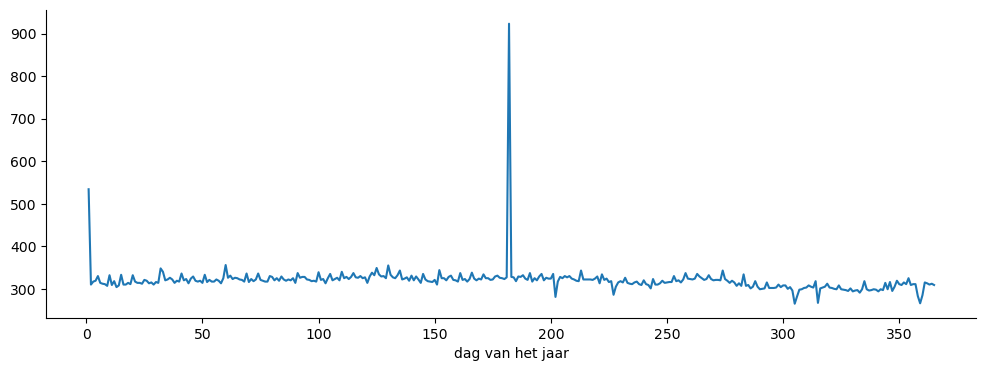

In [90]:
fig, ax = plt.subplots(figsize = (12,4))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


df_births_per_date = big_df.groupby('day_of_year').size().reset_index(name='aantal geboortes')

plt.xlabel("dag van het jaar")
plt.plot(df_births_per_date["day_of_year"], df_births_per_date["aantal geboortes"])



##

#### Vraag 2: Outliers vinden & behandelen

We klassificeren een datum als een outlier als het aantal geboortes meer dan `50%` afwijkt van de gemiddelde waarde overheen de volledige dataset. Zoek alle outliers in de dataset.

In [91]:
avg_aantal_geboortes = df_births_per_date["aantal geboortes"].mean()
onder_is_outlier = avg_aantal_geboortes / 2 
boven_is_outlier = avg_aantal_geboortes * 1.5

df_zonder_outliers = ( df_births_per_date[((df_births_per_date["aantal geboortes"] >= onder_is_outlier) & 
                                           (df_births_per_date["aantal geboortes"] <= boven_is_outlier))] ).copy()

df_met_outliers = ( df_births_per_date[((df_births_per_date["aantal geboortes"] <= onder_is_outlier) | 
                                           (df_births_per_date["aantal geboortes"] >= boven_is_outlier))] ).copy()

In [92]:
df_met_outliers

,day_of_year,aantal geboortes
0,1,534
181,182,923


Ik zal je vertellen; de outliers op 1 januari en 1 juli komen doordat alle geboortes waarvoor de datum niet correct genoteerd is, de datum 1 januari (voor de eerste helft van het jaar) en op 1 juli (voor de tweede helft van het jaar) geplaatst worden. Om dit op te lossen, halen we in de grote geboortes DataFrame (met 1 lijn per geboorte) deze twee datums er volledig uit. Dus we gaan **alle** geboortes van 1 januari en 1 juli verwijderen uit deze dataframe en toevoegen aan de `df_wrong` dataframe met als reden `2019-01-01` en `2019-07-01`.

In [93]:
for foute_dag in df_met_outliers["day_of_year"].unique() : 
    
    rows_to_remove = big_df[(big_df["day_of_year"] == foute_dag)].copy()
    rows_to_remove["error_reason"] = "hier moet ik nog de conversie maken naar het juiste formaat van de de foute dag"
    rows_to_remove = rows_to_remove.drop("day_of_year", axis=1)
    
    wrong_df = pd.concat([wrong_df, rows_to_remove], ignore_index=True)
    big_df = big_df[(big_df["day_of_year"] != foute_dag)]
        
    print(foute_dag)


1
182


In [94]:
wrong_df

,gemeente,naam,geslacht,verwachte datum,werkelijke_datum,error_reason
0,Kruisem,Patrick,Mannelijk,02/27/2019,2019-2-29,no valid birthday
1,Montigny-le-Tilleul,Sarah,Vrouwelijk,03/11/2019,2019-2-29,no valid birthday
2,Diepenbeek,Valentinus,Mannelijk,03/02/2019,2019-2-29,no valid birthday
3,Sint-Jans-Molenbeek,El,Mannelijk,02/27/2019,2019-2-29,no valid birthday
4,Overijse,Apolline,Vrouwelijk,03/03/2019,2019-2-29,no valid birthday
...,...,...,...,...,...,...
1525,Oostende,Magali,Vrouwelijk,07/15/2019,2019-7-1,hier moet ik nog de conversie maken naar het j...
1526,Rotselaar,Jean,Mannelijk,06/30/2019,2019-7-1,hier moet ik nog de conversie maken naar het j...
1527,Brussel,Lina,Vrouwelijk,07/11/2019,2019-7-1,hier moet ik nog de conversie maken naar het j...
1528,Hamont-Achel,Brenda,Vrouwelijk,06/25/2019,2019-7-1,hier moet ik nog de conversie maken naar het j...


Maak dezelfde plot nu opnieuw met het aantal geboortes per dag.

Text(0.5, 0, 'dag van het jaar')

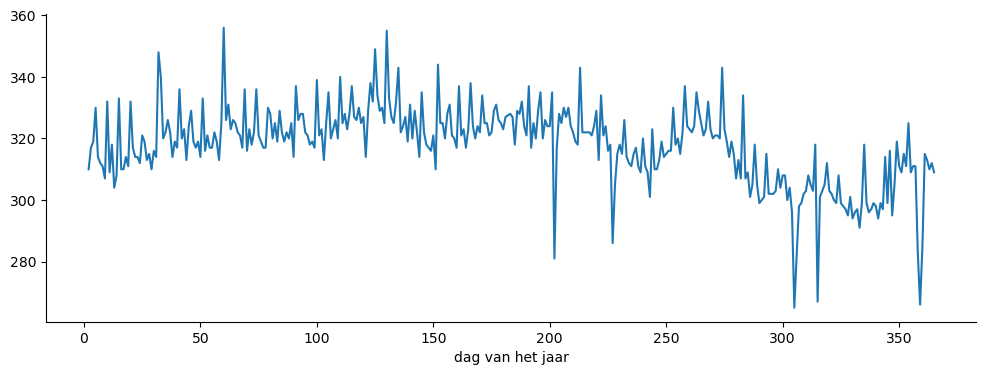

In [95]:
fig, ax = plt.subplots(figsize = (12,4))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(df_zonder_outliers["day_of_year"], df_zonder_outliers["aantal geboortes"])
plt.xlabel("dag van het jaar")

 We zien dat er nog steeds redelijk wat uitschieters zijn, kan je code schrijven om de 5 extreme uitschieters in de 2e helft van het jaar identificeren (in totaal 8 datums)?

In [96]:
# define outliers that are below a certain z score ... 



mean = df_zonder_outliers['aantal geboortes'].mean()
std_dev = df_zonder_outliers['aantal geboortes'].std()

# Calculate z-scores
df_zonder_outliers['z_score'] = (df_zonder_outliers['aantal geboortes'] - mean) / std_dev

# Identify outliers based on z-scores
df_outliers = df_zonder_outliers[df_zonder_outliers['z_score'] < - 2.5 ].copy()
df_zonder_zonder_outliers = df_zonder_outliers[df_zonder_outliers['z_score'] >= - 2.5 ].copy()

Text(0.5, 0, 'dag van het jaar')

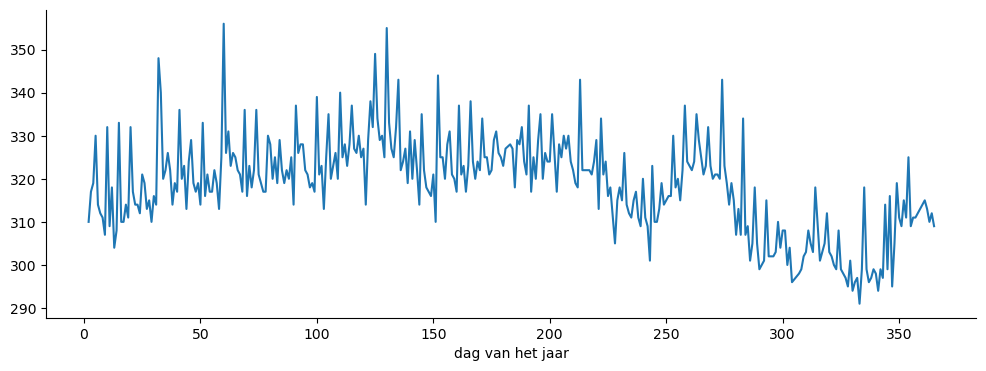

In [97]:
fig, ax = plt.subplots(figsize = (12,4))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(df_zonder_zonder_outliers["day_of_year"], df_zonder_zonder_outliers["aantal geboortes"])
plt.xlabel("dag van het jaar")

We zien dat er nog steeds redelijk wat uitschieters zijn, kan je code schrijven om de 5 extreme uitschieters in de 2e helft van het jaar identificeren (in totaal 8 datums)?

### Bonusvraag: wekelijkse verbanden

We zien vele pieken en dalen in de evolutie van het aantal geboortes. We willen deze grafiek graag iets "gladder" maken. Kan je hiervoor eens een visualizatie maken van het **gemiddeld** aantal geboortes per week (dit voor elke week, dus maandag-maandag, dinsdag-dinsdag, woensdag-woensdag, ...).

Text(0.5, 0, 'dag van het jaar')

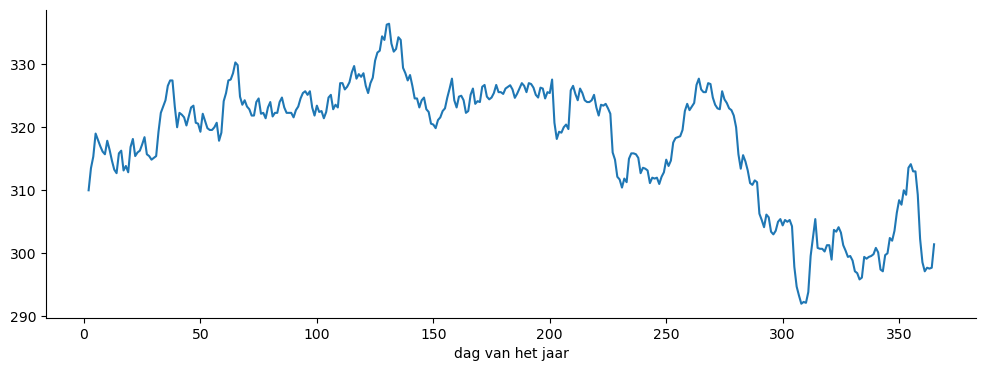

In [98]:
# first add the actual date 

# Function to construct the date
def construct_date(row):
    day_of_year = row['day_of_year']
    return datetime.datetime(2019, 1, 1) + datetime.timedelta(days=day_of_year - 1)

# Apply the function to construct the date for each row
df_zonder_outliers['geboorte datum'] = df_zonder_outliers.apply(lambda row: construct_date(row), axis=1)

# Set the 'date' column as the index
df_zonder_outliers.set_index('geboorte datum', inplace=True)

# Calculate the rolling 7-day average
df_zonder_outliers['rolling_avg_aantal_geboortes_7d'] = df_zonder_outliers['aantal geboortes'].rolling(window='7D').mean()



fig, ax = plt.subplots(figsize = (12,4))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(df_zonder_outliers["day_of_year"], df_zonder_outliers["rolling_avg_aantal_geboortes_7d"])
plt.xlabel("dag van het jaar")


Dat ziet er al een stuk mooier uit!  We zien ook een aantal duidelijk dips & pieken verschijnen die we eerder niet zagen. We kunnen nu ook even kijken naar het gemiddeld aantal geboortes per dag van de week! Misschien worden er wel gewoon veel minder mensen geboren op zondag dan een andere dag?

In [99]:
df_zonder_outliers = df_zonder_outliers.reset_index()
df_zonder_outliers['day_of_week'] = df_zonder_outliers['geboorte datum'].dt.day_name()

In [100]:
df_zonder_outliers

,geboorte datum,day_of_year,aantal geboortes,z_score,rolling_avg_aantal_geboortes_7d,day_of_week
0,2019-01-02,2,310,-0.622418,310.000000,Wednesday
1,2019-01-03,3,317,-0.070003,313.500000,Thursday
2,2019-01-04,4,319,0.087830,315.333333,Friday
3,2019-01-05,5,330,0.955911,319.000000,Saturday
4,2019-01-06,6,314,-0.306752,318.000000,Sunday
...,...,...,...,...,...,...
358,2019-12-27,361,315,-0.227836,297.142857,Friday
359,2019-12-28,362,313,-0.385669,297.714286,Saturday
360,2019-12-29,363,310,-0.622418,297.571429,Sunday
361,2019-12-30,364,312,-0.464585,297.714286,Monday


Text(0.5, 0, 'dag van het jaar')

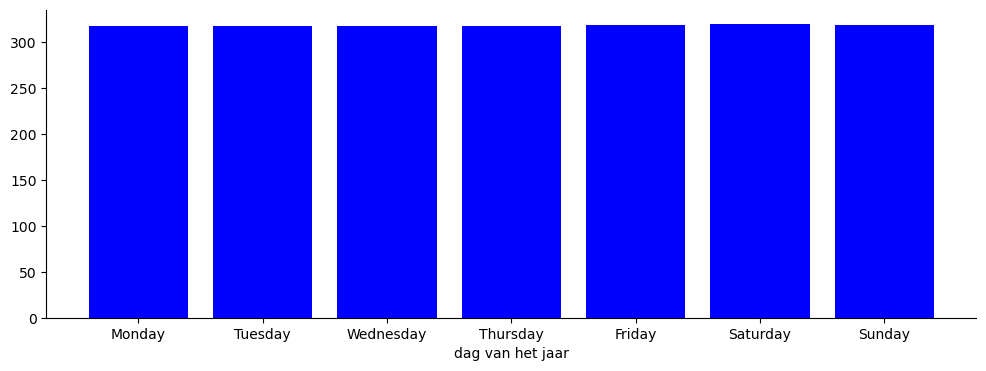

In [101]:
# Calculate average values for each weekday
average_geboortes_per_weekday = df_zonder_outliers.groupby('day_of_week')['aantal geboortes'].mean()

#volgorde terug goed krijgen 
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_geboortes_per_weekday = average_geboortes_per_weekday.reindex(custom_order)


fig, ax = plt.subplots(figsize = (12,4))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Plot the bar chart
plt.bar(average_geboortes_per_weekday.index, average_geboortes_per_weekday.values, color='blue')

plt.xlabel("dag van het jaar")

# Examen Python Data Developer
# Deel 2

Ga verder met de verwerkte data die je uit deel 1 hebt. We gaan nu op basis van dezelfde dataset een aantal onderzoeksvragen oplossen!

### Onderzoek 1: Unisex namen
#### Een aantal statistieken
Sommige namen zijn unisex, dat wil zeggen dat zij hetzelfde zijn voor mannen en vrouwen. Beantwoord volgende 3 vragen over unisex namen in onze dataset:
 - Hoeveel unisex namen zijn er?
 - Wat is de meest voorkomende unisex naam; hiervoor zoek ik 3 namen (en getallen):
    - De meest populaire unisex naam bij mannen.
    - De meest populaire unisex naam bij vrouwen.
    - De meest popuaire unisex naam.

**Tip:** Neem hiervoor terug de volledige dataset in acht (dus met de foutief geklasseerde namen).

In [102]:
all_names_df.head()

,gemeente,naam,geslacht,verwachte datum,werkelijke_datum,day_of_year,error_reason
0,Hooglede,Elias,Mannelijk,01/14/2019,2019-1-1,1.0,NaN
1,Sint-Niklaas (Sint-Niklaas),Pauline,Vrouwelijk,01/05/2019,2019-1-1,1.0,NaN
2,Wijnegem,Anita,Vrouwelijk,01/05/2019,2019-1-1,1.0,NaN
3,Grâce-Hollogne,Jean-Paul,Mannelijk,01/13/2019,2019-1-1,1.0,NaN
4,Boussu,François,Mannelijk,01/26/2019,2019-1-1,1.0,NaN


In [103]:
def find_most_popular_unisex_name(df_geboortes):
    """
    df_geboortes = df met kolommen naam, ml_count, vr_count, total_count
    zoekt en geeft terug de naam die het meest heeft voor ml_count enz. 
    """
    most_common_ml_name = ""
    most_common_vr_name = ""
    most_common_total_name = ""
    if not df_geboortes.empty:
        most_common_ml_name = df_geboortes.loc[df_geboortes['ml_count'].idxmax()]["naam"]
        most_common_vr_name = df_geboortes.loc[df_geboortes['vr_count'].idxmax()]["naam"]
        most_common_total_name = df_geboortes.loc[df_geboortes['total_count'].idxmax()]["naam"]
        
    return most_common_ml_name, most_common_vr_name, most_common_total_name



# Filter the DataFrame by geslacht
df_mannelijk = all_names_df[all_names_df['geslacht'] == 'Mannelijk']
df_vrouwelijk = all_names_df[all_names_df['geslacht'] == 'Vrouwelijk']

# Count occurrences for name
ml_counts = df_mannelijk.groupby('naam').size().reset_index(name='ml_count')
vr_counts = df_vrouwelijk.groupby('naam').size().reset_index(name='vr_count')

# Merge the counts on 'value' to find common values
unisex_counts = pd.merge(ml_counts, vr_counts, on='naam', how='inner')
unisex_counts["total_count"] = unisex_counts["ml_count"] + unisex_counts["vr_count"]
    
pop_man, pop_vrouw, pop_overall = find_most_popular_unisex_name(unisex_counts)
    
#print statements niet in de functie, niet zo netjes 
print(f"Populairste unisex naam bij de mannen: {pop_man}")
print(f"Populairste unisex naam bij de vrouwen: {pop_vrouw}")
print(f"Populairste unisex naam in het algemeen: {pop_overall}")

Populairste unisex naam bij de mannen: Maxime
Populairste unisex naam bij de vrouwen: Dominique
Populairste unisex naam in het algemeen: Dominique


We zien dat er een vrij groot aantal namen veel meer voorkomen bij mannen dan vrouwen (en omgekeerd). Dit vinden we eigenlijk geen "echte" unisex namen. We noemen een naam "echt unisex" als de naam niet meer dan 50% meer voorkomt bij 1 van de 2 geslachten. Dus als er `x` mannen en `y` vrouwen zijn genaamd Chris, dan noemen we Chris "echt unisex" als `x <= 1.5 * y` en `y <= x * 1.5`. Filter je unisex dataframe tot een `df_real_unisex` waarbij je enkel de "echte" unisex namen weerhoudt. 
- Beantwoord nu bovenstaande 3 vragen opnieuw voor deze dataset. Hierbij werk je best met een functie zodat je geen code moet herhalen!
- Zijn de echte unisex namen populairder bij mannen of vrouwen, of is de populariteit hetzelfde? Deze vraag kan je beantwoorden door te kijken naar het percentage mannen/vrouwen met een echte unisex naam.

In [104]:
real_unisex_counts = ( unisex_counts[((unisex_counts['ml_count'] <= 1.5 * unisex_counts['vr_count']) & 
                                      (unisex_counts['vr_count'] <= 1.5 * unisex_counts['ml_count'])) ].copy() )

pop_man, pop_vrouw, pop_overall = find_most_popular_unisex_name(real_unisex_counts)
    
print(f"Populairste unisex naam bij de mannen: {pop_man}")
print(f"Populairste unisex naam bij de vrouwen: {pop_vrouw}")
print(f"Populairste unisex naam in het algemeen: {pop_overall}")

print()

print(f"Percentage mannen met unisex naam: {round(real_unisex_counts['ml_count'].sum() / df_mannelijk['naam'].size * 1000) / 10}%")
print(f"Percentage vrouwen met unisex naam: {round(real_unisex_counts['vr_count'].sum() / df_vrouwelijk['naam'].size * 1000) / 10}%")

Populairste unisex naam bij de mannen: Dominique
Populairste unisex naam bij de vrouwen: Dominique
Populairste unisex naam in het algemeen: Dominique

Percentage mannen met unisex naam: 0.4%
Percentage vrouwen met unisex naam: 0.5%


In [105]:
real_unisex_counts["mannen"] = real_unisex_counts['ml_count'] / real_unisex_counts['total_count']
real_unisex_counts["vrouwen"] = 1 - real_unisex_counts["mannen"]

#### Visualizatie

Maak een visualizatie die alle echte unisex namen toont en de relatieve voorkomens bij mannen en vrouwen.

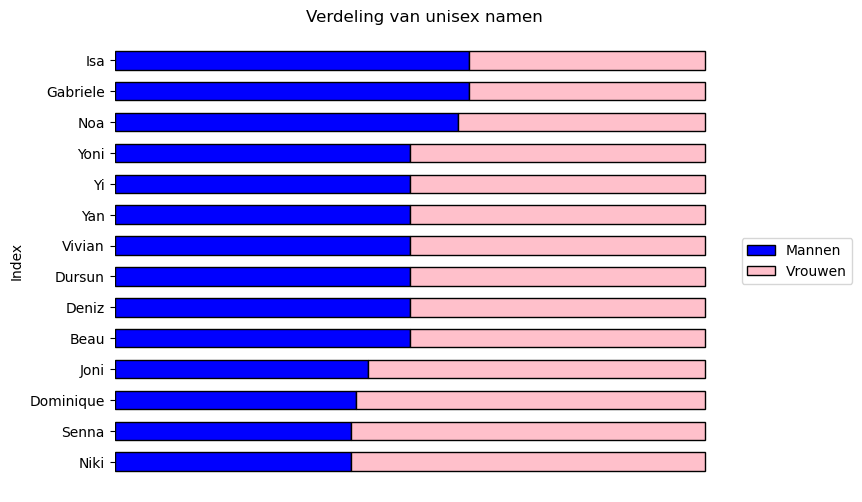

In [106]:
df_sorted = real_unisex_counts.sort_values(by='mannen', ascending=True)

plt.figure(figsize=(8, 6))

# Horizontal bar plot
bar_width = 0.6
index = range(len(df_sorted))

plt.barh(index, df_sorted['mannen'], bar_width, label='Mannen', color='blue', edgecolor='black')
plt.barh(index, df_sorted['vrouwen'], bar_width, left=df_sorted['mannen'], label='Vrouwen', color='pink', edgecolor='black')

# Adding labels
plt.xlabel('Count')
plt.ylabel('Index')


plt.yticks(index, df_sorted['naam'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xticks([])
plt.xlabel("")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Verdeling van unisex namen')
plt.show()

### Onderzoek 2: de accuraatheid van de geschatte bevallingsdatum
#### Evolutie vergelijken

Maak een afbeelding van het totaal aantal geboortes per dag en het totaal aantal verwachte geboortes.

**Bonusvraag**: Gewoon om over na te denken: waarom zien de uiteindes van je plot er wat gek uit? Schrijf het antwoord neer in een strategisch geplaatste markdown cel.

In [107]:
big_df.head()

,gemeente,naam,geslacht,verwachte datum,werkelijke_datum,day_of_year
534,Merksplas,Liliane,Vrouwelijk,01/04/2019,2019-1-10,10
535,Bornem,Jeroen,Mannelijk,01/10/2019,2019-1-10,10
536,Houthalen-Helchteren,Fatima,Vrouwelijk,01/21/2019,2019-1-10,10
537,Lievegem,Hilaire,Mannelijk,01/15/2019,2019-1-10,10
538,Spiere-Helkijn,Christian,Mannelijk,01/16/2019,2019-1-10,10


In [108]:
def verwachte_datum_as_date (row) : 
    verwachte_datum = row['verwachte datum']
    verwachte_datum_as_date = datetime.datetime.strptime(verwachte_datum, "%m/%d/%Y")
    return verwachte_datum_as_date
    
# Apply the function to construct the date for each row
big_df['verwachte_datum_as_date'] = big_df.apply(lambda row: verwachte_datum_as_date(row), axis=1)
big_df['werkelijke_datum_as_date'] = big_df.apply(lambda row: construct_date(row), axis=1)


In [109]:
big_df.head()

,gemeente,naam,geslacht,verwachte datum,werkelijke_datum,day_of_year,verwachte_datum_as_date,werkelijke_datum_as_date
534,Merksplas,Liliane,Vrouwelijk,01/04/2019,2019-1-10,10,2019-01-04,2019-01-10
535,Bornem,Jeroen,Mannelijk,01/10/2019,2019-1-10,10,2019-01-10,2019-01-10
536,Houthalen-Helchteren,Fatima,Vrouwelijk,01/21/2019,2019-1-10,10,2019-01-21,2019-01-10
537,Lievegem,Hilaire,Mannelijk,01/15/2019,2019-1-10,10,2019-01-15,2019-01-10
538,Spiere-Helkijn,Christian,Mannelijk,01/16/2019,2019-1-10,10,2019-01-16,2019-01-10


In [110]:
def set_day_of_year (row) : 
    verwachte_datum = row['verwachte_datum']
    return verwachte_datum.timetuple().tm_yday
    

# Count occurrences for each column
verwachte_counts = big_df['verwachte_datum_as_date'].value_counts().reset_index()
verwachte_counts.columns = ['verwachte_datum', 'verwachte_count']

werkelijke_counts = big_df['werkelijke_datum_as_date'].value_counts().reset_index()
werkelijke_counts.columns = ['werkelijke_datum', 'werkelijke_count']

# Merge the counts
merged_df = pd.merge(verwachte_counts, werkelijke_counts, left_on='verwachte_datum', right_on='werkelijke_datum', how='outer')

# Fill NaN values with 0
merged_df = merged_df.fillna(0)

merged_df = merged_df.sort_values(by='verwachte_datum')

    
# Apply the function to construct the date for each row
merged_df["day_of_year"] = merged_df.apply(lambda row: set_day_of_year(row), axis=1)

print(merged_df)

    verwachte_datum  verwachte_count werkelijke_datum  werkelijke_count  \
396      2018-12-27               13                0               0.0   
393      2018-12-28               18                0               0.0   
390      2018-12-29               22                0               0.0   
385      2018-12-30               34                0               0.0   
386      2018-12-31               33                0               0.0   
..              ...              ...              ...               ...   
424      2020-02-22                1                0               0.0   
421      2020-02-23                2                0               0.0   
425      2020-02-24                1                0               0.0   
419      2020-02-25                2                0               0.0   
422      2020-02-28                2                0               0.0   

     day_of_year  
396          361  
393          362  
390          363  
385          364  
386 

In [111]:
merged_df_only_2019 = merged_df[merged_df['werkelijke_datum']!=0]

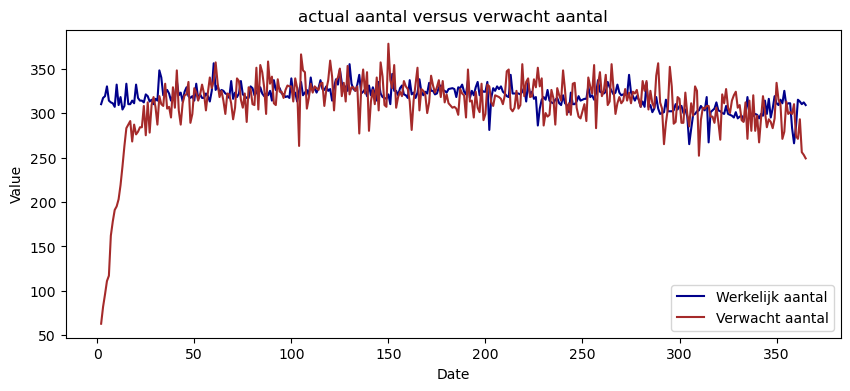

In [112]:
# Plotting
plt.figure(figsize=(10, 4))

# Plotting lines for each column
plt.plot(merged_df_only_2019['day_of_year'], merged_df_only_2019['werkelijke_count'], label='Werkelijk aantal', color="darkblue")
plt.plot(merged_df_only_2019['day_of_year'], merged_df_only_2019['verwachte_count'], label='Verwacht aantal', color="brown")

# Adding title and labels
plt.title('actual aantal versus verwacht aantal')
plt.xlabel('Date')
plt.ylabel('Value')

# Adding legend
plt.legend()

# Show plot
plt.show()

#### Waarom dat onevenwicht tussen verwacht en werkelijk aantal in het begin (en op het einde ??)

Op het einde krijg ik dat dus niet .... 
Het onevenwicht komt van : 
  - de basis van de data is de effectieve geboortedatum 
  - lijnen van baby's die later werden geboren (op 1/1, 2/1, maar vroeger werden verwacht, die lijnen zijn geschrapt), het omgekeerde effect (later geboren dan verwacht), dat heb je niet aan die rand 
  
  - waarom de andere rand er niet is, don't know, maar daar heb je een gelijkaardig effect µ
  - het effect dat beide lijnen niet even stijl zijn, komt van het feit dat we er meer baby's vroeger worden geboren dan verwacht dan dat er baby's later dan verwacht worden geboren 


#### Verbanden bekijken
Maak een histogram van het aantal dagen dat babies te vroeg geboren werden in 2019 en een scatterplot die het verband toont tussen de verwachte en effectieve geboortedatum.

In [113]:
def datedays_to_int_days (row) : 
    return row["te_vroeg"].days

big_df["te_vroeg"] = big_df["werkelijke_datum_as_date"] - big_df["verwachte_datum_as_date"]
big_df["te_vroeg_int"] = big_df.apply(lambda row: datedays_to_int_days(row), axis=1)



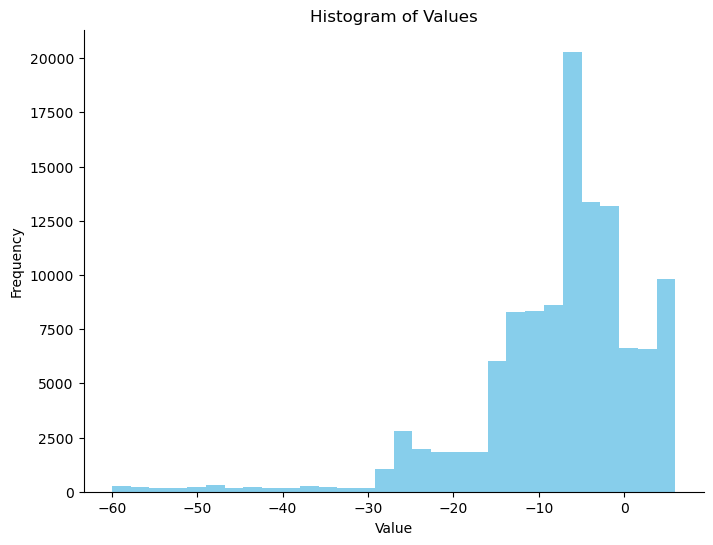

In [114]:
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(big_df['te_vroeg_int'], bins=30, color='skyblue')  # Adjust the number of bins as needed
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

### geraak maar tot hier :-( 
ga nu nog de github + readme update enz om op tijd te zijn .. .